In [1]:
import pandas as pd
import numpy as np

In [2]:
h =pd.read_csv("/content/Housing.csv")

In [3]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
# Check the head of the dataset
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
h.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# Checking Null values
h.isnull().sum()*100/h.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

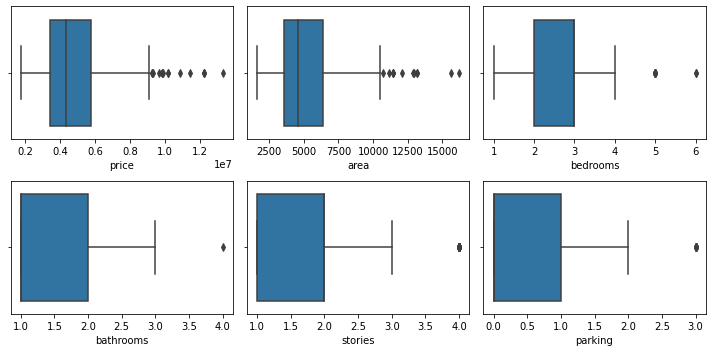

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(h['price'], ax = axs[0,0])
plt2 = sns.boxplot(h['area'], ax = axs[0,1])
plt3 = sns.boxplot(h['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(h['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(h['stories'], ax = axs[1,1])
plt3 = sns.boxplot(h['parking'], ax = axs[1,2])

plt.tight_layout()

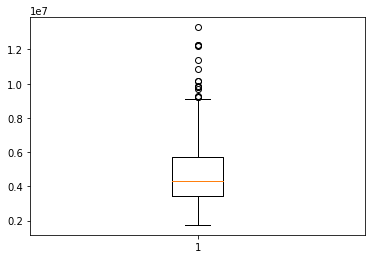

In [11]:
# outlier treatment for price
plt.boxplot(h.price)
Q1 = h.price.quantile(0.25)
Q3 = h.price.quantile(0.75)
IQR = Q3 - Q1
h = h[(h.price >= Q1 - 1.5*IQR) & (h.price <= Q3 + 1.5*IQR)]

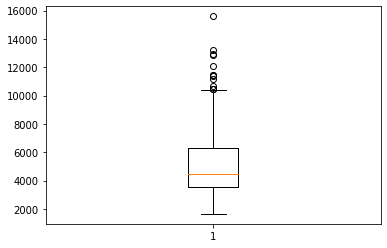

In [12]:
# outlier treatment for area
plt.boxplot(h.area)
Q1 = h.area.quantile(0.25)
Q3 = h.area.quantile(0.75)
IQR = Q3 - Q1
housing = h[(h.area >= Q1 - 1.5*IQR) & (h.area <= Q3 + 1.5*IQR)]

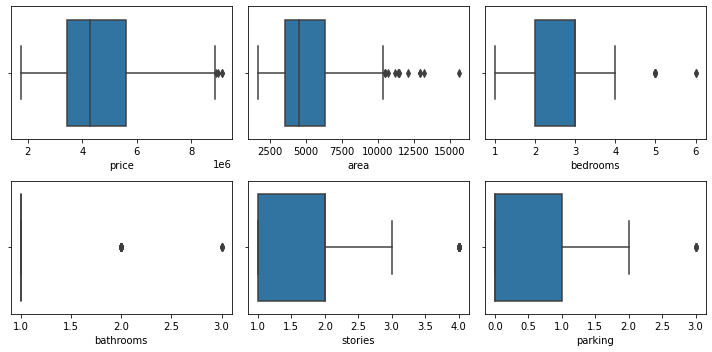

In [13]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(h['price'], ax = axs[0,0])
plt2 = sns.boxplot(h['area'], ax = axs[0,1])
plt3 = sns.boxplot(h['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(h['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(h['stories'], ax = axs[1,1])
plt3 = sns.boxplot(h['parking'], ax = axs[1,2])

plt.tight_layout()

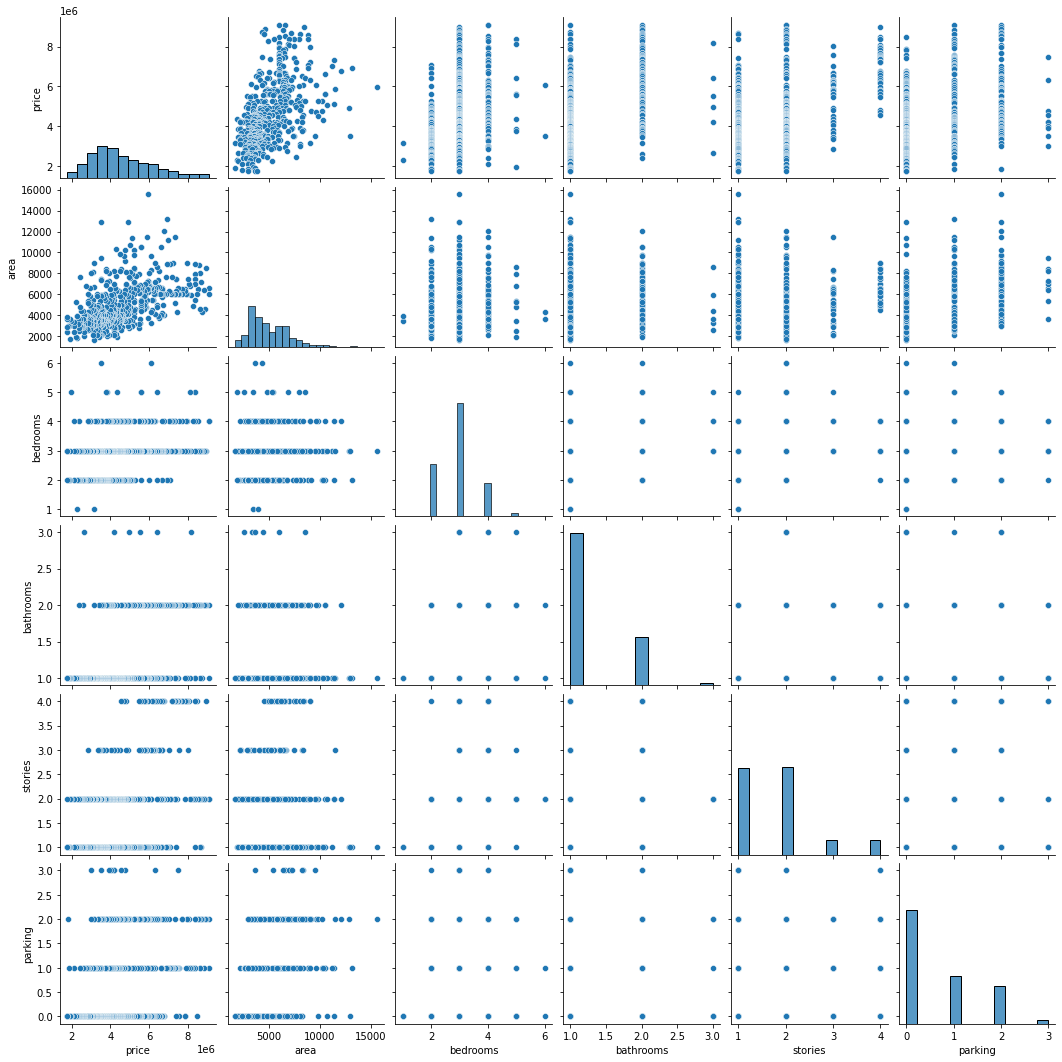

In [14]:
sns.pairplot(h)
plt.show()

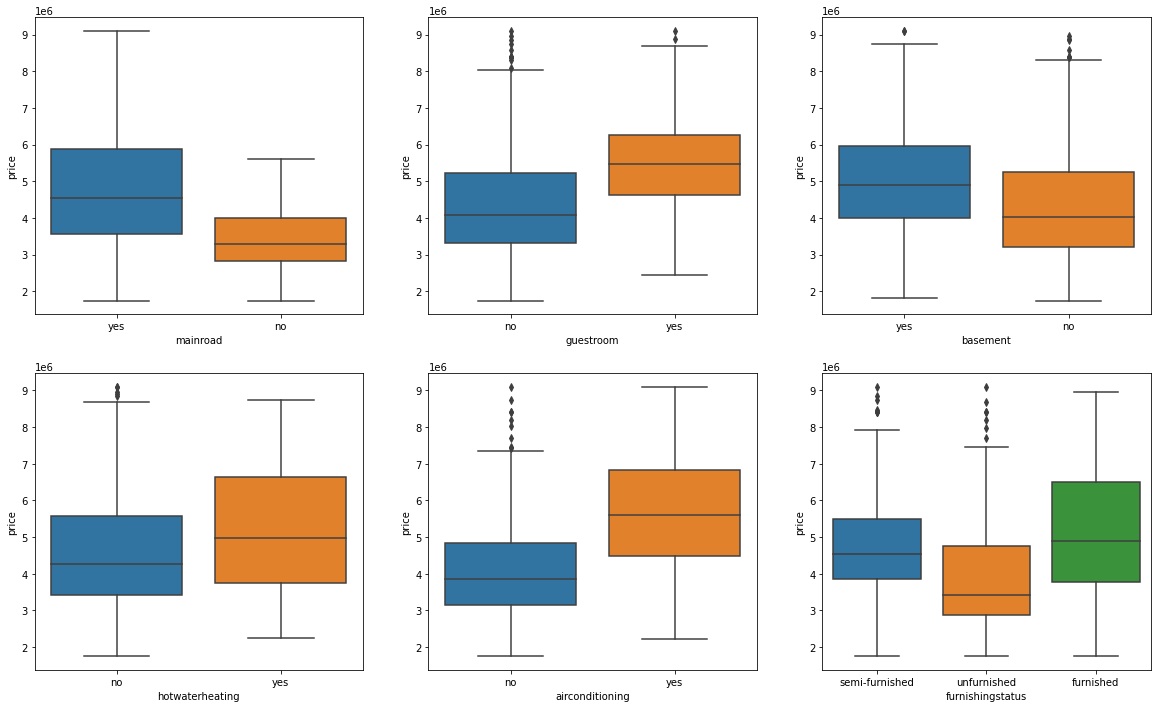

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = h)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = h)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = h)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = h)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = h)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = h)
plt.show()

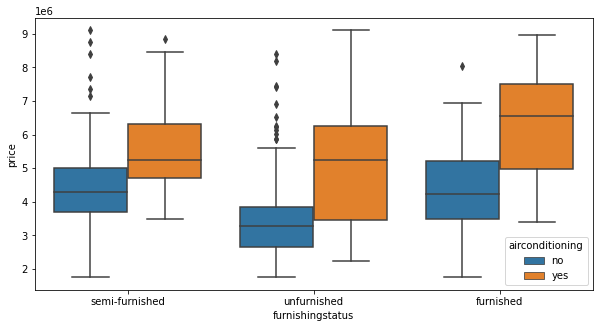

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = h)
plt.show()

In [17]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
h[varlist] = h[varlist].apply(binary_map)

In [18]:
# Check the housing dataframe now

h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [19]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(h['furnishingstatus'])

In [20]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [21]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(h['furnishingstatus'], drop_first = True)

In [22]:
# Add the results to the original housing dataframe

h = pd.concat([h, status], axis = 1)

In [23]:
# Now let's see the head of our dataframe.

h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [24]:
# Drop 'furnishingstatus' as we have created the dummies for it

h.drop(['furnishingstatus'], axis = 1, inplace = True)

In [25]:
h.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(h, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,0,1
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,0,1
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,1,0


In [31]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243,0.458221,0.299191
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031,0.498924,0.458522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


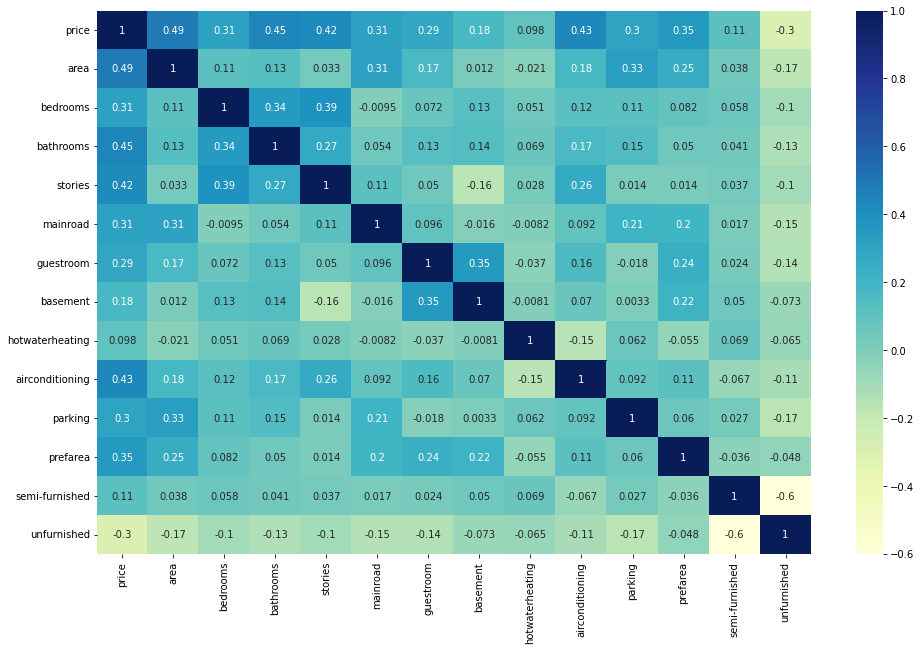

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [33]:
y_train = df_train.pop('price')
X_train = df_train

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Thank You Rudhra